# Titanic PCA

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def encode_label(df):
    #Label
    return df.astype('category').cat.codes

## Visualizing the data

In [4]:
df_train = pd.read_csv('./data/train.csv', header = 0, dtype={'Age': np.float64})
df_test  = pd.read_csv('./data/results.csv' , header = 0, dtype={'Age': np.float64})
df = df_train.append(df_test, ignore_index=True)

In [5]:
df.info()
df[0:20]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df.shape[0]

1309

### Sex

In [7]:
df['Sex'] = df['Sex'].map({'male': 0, 'female':1})

### Ticket

In [8]:
df['Ticket'] = df['Ticket'].map(lambda k: k[0])

In [9]:
df[0:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,P,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,S,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,1,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,3,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,3,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,1,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,3,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,3,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,2,30.0708,NaN,C


In [10]:
df['Ticket'] = df['Ticket'].replace(['A','W','F','L','5','6','7','8','9'], '4')
df['Ticket']

0       4
1       P
2       S
3       1
4       3
       ..
1304    4
1305    P
1306    S
1307    3
1308    2
Name: Ticket, Length: 1309, dtype: object

In [11]:
df['Ticket'] = encode_label(df['Ticket'])

In [12]:
df['Ticket']

0       3
1       5
2       6
3       0
4       2
       ..
1304    3
1305    5
1306    6
1307    2
1308    1
Name: Ticket, Length: 1309, dtype: int8

In [13]:
df['Ticket'].value_counts()

2    429
1    278
0    210
3    119
6     98
5     98
4     77
Name: Ticket, dtype: int64

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,3,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,5,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,6,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,2,8.0500,NaN,S


### Fare

Filling the Na of the Fare

In [15]:
df['Fare'].isna().value_counts()

False    1308
True        1
Name: Fare, dtype: int64

In [16]:
na_fare = df[df['Fare'].isna()]

In [17]:
na_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,0,3,"Storey, Mr. Thomas",0,60.5,0,0,2,NaN,NaN,S


In [18]:
na_fare['Ticket'].values[0]

2

In [19]:
df['Fare'].loc[ (df['Ticket'] == na_fare['Ticket'].values[0]) & 
                            (df['Pclass'] == na_fare['Pclass'].values[0]) & 
                            (df['Embarked'] == na_fare['Embarked'].values[0])].mean()

12.072079522184305

In [20]:
guess_Fare = df['Fare'].loc[ (df['Ticket'] == na_fare['Ticket'].values[0]) & 
                            (df['Pclass'] == na_fare['Pclass'].values[0]) & 
                            (df['Embarked'] == na_fare['Embarked'].values[0])].median()
df['Fare'].fillna(guess_Fare , inplace=True)

In [21]:
df['Fare'].isna().value_counts()

False    1309
Name: Fare, dtype: int64

### Fare bins

<AxesSubplot:>

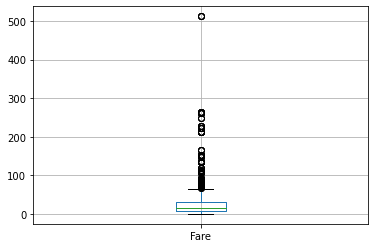

In [22]:
df.boxplot('Fare')

In [23]:
# bin Fare into five intervals with equal amount of people
df['Fare-bin'] = pd.qcut(df.Fare,5,labels=[1,2,3,4,5]).astype(int)

### Cabin

In [24]:
# check if there is any NAN
df['Cabin'].isnull().sum(axis=0)

1014

In [25]:
df = df.drop(labels=['Cabin'], axis=1)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-bin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,3,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,5,71.2833,C,5
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,6,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0,53.1000,S,5
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,2,8.0500,S,2


### Embarked

In [27]:
#df = df.drop(labels='Embarked', axis=1)
df['Embarked'].isna().value_counts()

False    1307
True        2
Name: Embarked, dtype: int64

In [28]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [29]:
df['Embarked'].fillna("S", inplace=True)

In [30]:
df['Embarked'].isna().value_counts()

False    1309
Name: Embarked, dtype: int64

In [31]:
df['Embarked'] = encode_label(df['Embarked'])

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-bin
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,3,7.2500,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,5,71.2833,0,5
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,6,7.9250,2,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,0,53.1000,2,5
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,2,8.0500,2,2


### Name

In [33]:
df['Title'] = df['Name'].map(lambda z: z.split(",")[1].split(".")[0])

In [34]:
df['Title'] = encode_label(df['Title'])

In [35]:
def get_titles(df):
    title_dictionary = {
        "Capt": "Officer",
        "Col": "Officer",
        "Major": "Officer",
        "Jonkheer": "Royalty",
        "Don": "Royalty",
        "Dona": "Royalty",
        "Sir": "Royalty",
        "Dr": "Officer",
        "Rev": "Officer",
        "the Countess": "Royalty",
        "Mme": "Mrs",
        "Mlle": "Miss",
        "Ms": "Mrs",
        "Mr": "Mr",
        "Mrs": "Mrs",
        "Miss": "Miss",
        "Master": "Master",
        "Lady": "Royalty"
    }
    print(df['Name'])

    def process_name(x):
        # print(x)
        return x.split(',')[1].split('.')[0].strip()

    df['Title'] = df['Name'].map(process_name)
    df['Title'] = df.Title.map(title_dictionary)
    print(df['Name'][df['Title'].isna()])

    return df

In [36]:
df = get_titles(df)
df['Title'] = df['Title'].map({'Officer': 0, 'Royalty': 1, 'Mrs': 2, 'Miss': 3, 'Master': 4, 'Mr': 5}).astype(int)

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object
Series([], Name: Name, dtype: object)


In [37]:
df.drop('Name', axis=1, inplace=True)

In [38]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-bin,Title
0,1,0,3,0,22.0,1,0,3,7.2500,2,1,5
1,2,1,1,1,38.0,1,0,5,71.2833,0,5,2
2,3,1,3,1,26.0,0,0,6,7.9250,2,2,3
3,4,1,1,1,35.0,1,0,0,53.1000,2,5,2
4,5,0,3,0,35.0,0,0,2,8.0500,2,2,5


### PassengerId

In [39]:
df.drop('PassengerId',axis= 1, inplace=True)

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-bin,Title
0,0,3,0,22.0,1,0,3,7.2500,2,1,5
1,1,1,1,38.0,1,0,5,71.2833,0,5,2
2,1,3,1,26.0,0,0,6,7.9250,2,2,3
3,1,1,1,35.0,1,0,0,53.1000,2,5,2
4,0,3,0,35.0,0,0,2,8.0500,2,2,5


### Age

In [41]:
df['Age'].isna().value_counts()

False    1046
True      263
Name: Age, dtype: int64

The change of Age as a function of Title, Fare-bin, or SibSp is quite significant, so we'll use them to guess the missing values. We'll use a random forest regressor to do this. 

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
# notice that instead of using Title, we should use its corresponding dummy variables 
df_sub = df[['Age','Title','Fare','SibSp']]

In [44]:
X_train  = df_sub.dropna().drop('Age', axis=1)
y_train  = df['Age'].dropna()

X_test = df_sub.loc[np.isnan(df.Age)].drop('Age', axis=1)

In [45]:
regressor = RandomForestRegressor(n_estimators = 300)
regressor.fit(X_train, y_train)
y_pred = np.round(regressor.predict(X_test),1)

In [46]:
df.Age.loc[df.Age.isnull()] = y_pred
df.Age.isnull().sum(axis=0) # no more NAN now

0

In [47]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-bin,Title
0,0,3,0,22.0,1,0,3,7.2500,2,1,5
1,1,1,1,38.0,1,0,5,71.2833,0,5,2
2,1,3,1,26.0,0,0,6,7.9250,2,2,3
3,1,1,1,35.0,1,0,0,53.1000,2,5,2
4,0,3,0,35.0,0,0,2,8.0500,2,2,5


In [48]:
df['Age-bin'] = df['Age']
df.loc[df['Age-bin'] <= 16, 'Age-bin'] = 0
df.loc[(df['Age-bin'] > 16) & (df['Age-bin'] <= 32), 'Age-bin'] = 1
df.loc[(df['Age-bin'] > 32), 'Age-bin'] = 2

In [49]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-bin,Title,Age-bin
0,0,3,0,22.0,1,0,3,7.2500,2,1,5,1.0
1,1,1,1,38.0,1,0,5,71.2833,0,5,2,2.0
2,1,3,1,26.0,0,0,6,7.9250,2,2,3,1.0
3,1,1,1,35.0,1,0,0,53.1000,2,5,2,2.0
4,0,3,0,35.0,0,0,2,8.0500,2,2,5,2.0


### Family

In [50]:
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
df['Singleton'] = df['FamilySize'].map(lambda s: 1 if s == 1 else 0)
df['SmallFamily'] = df['FamilySize'].map(lambda s: 1 if 2 <= s <= 3 else 0)
df['MediumFamily'] = df['FamilySize'].map(lambda s: 1 if s == 4 else 0)
df['LargeFamily'] = df['FamilySize'].map(lambda s: 1 if 5 <= s else 0)


In [51]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare-bin,Title,Age-bin,FamilySize,Singleton,SmallFamily,MediumFamily,LargeFamily
0,0,3,0,22.0,1,0,3,7.2500,2,1,5,1.0,2,0,1,0,0
1,1,1,1,38.0,1,0,5,71.2833,0,5,2,2.0,2,0,1,0,0
2,1,3,1,26.0,0,0,6,7.9250,2,2,3,1.0,1,1,0,0,0
3,1,1,1,35.0,1,0,0,53.1000,2,5,2,2.0,2,0,1,0,0
4,0,3,0,35.0,0,0,2,8.0500,2,2,5,2.0,1,1,0,0,0


# First ML executions

In [52]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

In [53]:
df_basic = df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked']]

In [54]:
df_basic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,0,22.0,1,0,3,7.2500,2
1,1,1,1,38.0,1,0,5,71.2833,0
2,1,3,1,26.0,0,0,6,7.9250,2
3,1,1,1,35.0,1,0,0,53.1000,2
4,0,3,0,35.0,0,0,2,8.0500,2


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      1309 non-null   int64  
 1   Pclass        1309 non-null   int64  
 2   Sex           1309 non-null   int64  
 3   Age           1309 non-null   float64
 4   SibSp         1309 non-null   int64  
 5   Parch         1309 non-null   int64  
 6   Ticket        1309 non-null   int8   
 7   Fare          1309 non-null   float64
 8   Embarked      1309 non-null   int8   
 9   Fare-bin      1309 non-null   int32  
 10  Title         1309 non-null   int32  
 11  Age-bin       1309 non-null   float64
 12  FamilySize    1309 non-null   int64  
 13  Singleton     1309 non-null   int64  
 14  SmallFamily   1309 non-null   int64  
 15  MediumFamily  1309 non-null   int64  
 16  LargeFamily   1309 non-null   int64  
dtypes: float64(3), int32(2), int64(10), int8(2)
memory usage: 145.9 KB


### Feature Selection and Clasifiying

In [56]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [57]:
X = df_basic.drop('Survived', axis=1)
y = df_basic['Survived']

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [59]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(1309, 7)

In [60]:
X_new

array([[ 3.    ,  0.    , 22.    , ...,  3.    ,  7.25  ,  2.    ],
       [ 1.    ,  1.    , 38.    , ...,  5.    , 71.2833,  0.    ],
       [ 3.    ,  1.    , 26.    , ...,  6.    ,  7.925 ,  2.    ],
       ...,
       [ 3.    ,  0.    , 38.5   , ...,  6.    ,  7.25  ,  2.    ],
       [ 3.    ,  0.    , 31.    , ...,  2.    ,  8.05  ,  2.    ],
       [ 3.    ,  0.    ,  2.5   , ...,  1.    , 22.3583,  0.    ]])

In [61]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True, gamma='scale'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(solver='lbfgs')]

In [62]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_new, y)
clf.score(X_new, y)


0.9732620320855615

# Following with the feature extraction

### Dummy extraction

In [63]:
df = pd.get_dummies(df, columns=['Embarked', 'Pclass', 'Age-bin','Fare-bin', 'Title', 'Ticket'])

In [64]:
df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,FamilySize,Singleton,SmallFamily,MediumFamily,...,Title_3,Title_4,Title_5,Ticket_0,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_5,Ticket_6
0,0,0,22.0,1,0,7.2500,2,0,1,0,...,0,0,1,0,0,0,1,0,0,0
1,1,1,38.0,1,0,71.2833,2,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,26.0,0,0,7.9250,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,1,35.0,1,0,53.1000,2,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,35.0,0,0,8.0500,1,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 38 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      1309 non-null   int64  
 1   Sex           1309 non-null   int64  
 2   Age           1309 non-null   float64
 3   SibSp         1309 non-null   int64  
 4   Parch         1309 non-null   int64  
 5   Fare          1309 non-null   float64
 6   FamilySize    1309 non-null   int64  
 7   Singleton     1309 non-null   int64  
 8   SmallFamily   1309 non-null   int64  
 9   MediumFamily  1309 non-null   int64  
 10  LargeFamily   1309 non-null   int64  
 11  Embarked_0    1309 non-null   uint8  
 12  Embarked_1    1309 non-null   uint8  
 13  Embarked_2    1309 non-null   uint8  
 14  Pclass_1      1309 non-null   uint8  
 15  Pclass_2      1309 non-null   uint8  
 16  Pclass_3      1309 non-null   uint8  
 17  Age-bin_0.0   1309 non-null   uint8  
 18  Age-bin_1.0   1309 non-null 

## PCA

In [66]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca = df.drop(['Survived', 'Age', 'Fare'], axis=1,)
pca.fit_transform(df_pca)
y_variance = pca.explained_variance_ratio_
df_pca.head()

,Sex,SibSp,Parch,FamilySize,Singleton,SmallFamily,MediumFamily,LargeFamily,Embarked_0,Embarked_1,...,Title_3,Title_4,Title_5,Ticket_0,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_5,Ticket_6
0,0,1,0,2,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,1,0,2,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,1,1,0,2,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [67]:
print(y_variance)

[4.56826039e-01 9.43988803e-02 6.39236167e-02 5.94513234e-02
 5.20183483e-02 3.90980084e-02 3.68785460e-02 3.29346126e-02
 2.15375452e-02 2.12442036e-02 1.91789576e-02 1.65684958e-02
 1.36637246e-02 1.16739777e-02 1.09923318e-02 1.05463646e-02
 9.15566991e-03 6.32497571e-03 5.65839927e-03 4.72171901e-03
 3.85972549e-03 3.27806979e-03 2.12531968e-03 2.03550255e-03
 1.22233505e-03 5.88385226e-04 9.49220276e-05 6.47071073e-32
 1.51046440e-32 2.67666928e-33 2.67666928e-33 2.67666928e-33
 2.67666928e-33 2.67666928e-33 1.09664511e-33]


In [68]:
print(pd.DataFrame(pca.components_, columns=df_pca.columns))

         Sex     SibSp     Parch  FamilySize  Singleton  SmallFamily  \
0   0.054722  0.449280  0.331058    0.780338  -0.176223     0.060788   
1  -0.177873  0.192322 -0.117733    0.074590   0.158426    -0.199583   
2   0.292154 -0.554684  0.580263    0.025579  -0.006807    -0.027393   
3  -0.438965 -0.274945  0.383553    0.108608   0.117896    -0.175701   
4  -0.044426  0.070651 -0.098807   -0.028156  -0.084058     0.106440   
5  -0.246359 -0.063724  0.102260    0.038536  -0.111671     0.146184   
6  -0.038051 -0.107974  0.161170    0.053196   0.012436    -0.023986   
7   0.075295  0.070446  0.002162    0.072608   0.445055    -0.606774   
8  -0.119936 -0.062340  0.000990   -0.061350  -0.149001     0.160664   
9  -0.013120  0.013001 -0.009108    0.003893   0.097869    -0.116994   
10 -0.181717 -0.089412  0.058897   -0.030515  -0.073316     0.092482   
11  0.041304  0.001307 -0.035766   -0.034460  -0.048913     0.069586   
12 -0.015069  0.016119 -0.027245   -0.011126   0.173316    -0.26

Text(0.5, 1.0, 'PCA')

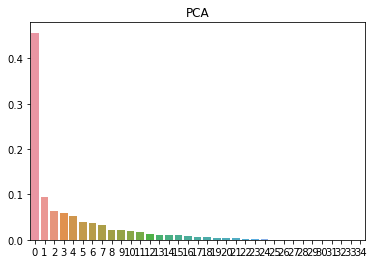

In [69]:
sns.barplot(x=[i for i in range(len(y_variance))], y=y_variance)
plt.title("PCA")

### Feature Selection

In [70]:
pca = PCA()
df_pca = df.drop(['Survived', 'Fare', 'FamilySize', 'Age', 'LargeFamily', 'SibSp', 'Parch', 'Ticket_6', 'Age-bin_2.0', 'Title_5', 'Pclass_3', 'Fare-bin_5', 'Embarked_2'], axis=1,)
df_transformed = pca.fit_transform(df_pca)
y_variance = pca.explained_variance_ratio_
df_pca.head()

,Sex,Singleton,SmallFamily,MediumFamily,Embarked_0,Embarked_1,Pclass_1,Pclass_2,Age-bin_0.0,Age-bin_1.0,...,Title_1,Title_2,Title_3,Title_4,Ticket_0,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_5
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [71]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Sex           1309 non-null   int64
 1   Singleton     1309 non-null   int64
 2   SmallFamily   1309 non-null   int64
 3   MediumFamily  1309 non-null   int64
 4   Embarked_0    1309 non-null   uint8
 5   Embarked_1    1309 non-null   uint8
 6   Pclass_1      1309 non-null   uint8
 7   Pclass_2      1309 non-null   uint8
 8   Age-bin_0.0   1309 non-null   uint8
 9   Age-bin_1.0   1309 non-null   uint8
 10  Fare-bin_1    1309 non-null   uint8
 11  Fare-bin_2    1309 non-null   uint8
 12  Fare-bin_3    1309 non-null   uint8
 13  Fare-bin_4    1309 non-null   uint8
 14  Title_0       1309 non-null   uint8
 15  Title_1       1309 non-null   uint8
 16  Title_2       1309 non-null   uint8
 17  Title_3       1309 non-null   uint8
 18  Title_4       1309 non-null   uint8
 19  Ticket_0      1309 non-null

Text(0.5, 1.0, 'PCA')

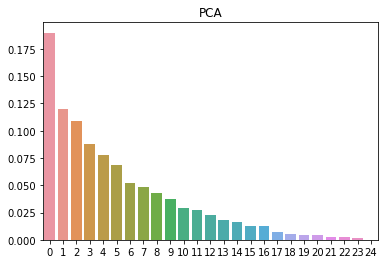

In [72]:
sns.barplot(x=[i for i in range(len(y_variance))], y=y_variance)
plt.title("PCA")

In [73]:
df_transformed

array([[-6.30442382e-03,  1.21597564e-01,  1.11128008e-01, ...,
        -5.46428914e-02, -5.48711791e-03,  5.41576495e-03],
       [ 1.54074446e+00, -6.61071483e-01,  3.33485242e-01, ...,
         3.37091197e-02, -3.17920916e-02,  3.55756508e-03],
       [-5.56645384e-01,  8.65863064e-02,  5.96666281e-01, ...,
        -9.19851825e-02,  5.24397131e-03, -4.13695691e-03],
       ...,
       [-5.83080051e-01, -3.03048532e-01, -3.56611255e-01, ...,
        -7.60096123e-02, -2.49630248e-03,  6.80069082e-04],
       [-1.14007594e+00, -6.15366195e-02,  1.76733878e-01, ...,
         1.87400771e-02,  2.35878029e-03,  9.98052906e-05],
       [ 1.15523831e+00,  3.22062972e-01, -5.81164883e-01, ...,
         1.82285100e-01,  7.56420976e-03, -3.14486536e-03]])

## Classification

In [74]:
y_train = df[0:891]['Survived']
X_train = df_pca[0:891]
y_test = df[891:]['Survived']
X_test = df_pca[891:]

In [75]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33)

### Traditional methods

In [76]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

In [77]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [78]:
X_train

array([[-0.73769513, -1.2316449 ,  1.54526137, ...,  3.09953914,
        -0.23598136, -0.28052182],
       [ 1.35557354, -1.2316449 ,  1.54526137, ..., -0.32262861,
        -0.23598136,  3.56478503],
       [ 1.35557354,  0.81192233, -0.64713971, ..., -0.32262861,
        -0.23598136, -0.28052182],
       ...,
       [ 1.35557354, -1.2316449 , -0.64713971, ...,  3.09953914,
        -0.23598136, -0.28052182],
       [-0.73769513,  0.81192233, -0.64713971, ..., -0.32262861,
        -0.23598136, -0.28052182],
       [-0.73769513,  0.81192233, -0.64713971, ..., -0.32262861,
        -0.23598136, -0.28052182]])

In [79]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True, gamma='scale'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(solver='lbfgs')]

In [80]:
scores = []
for clf in classifiers:
    clf.fit(X_train, y_train)
    cv_results = cross_validate(clf, X_test, y_test, cv=5, return_train_score=True)
    scores.append(np.mean(cv_results['test_score']))

<AxesSubplot:>

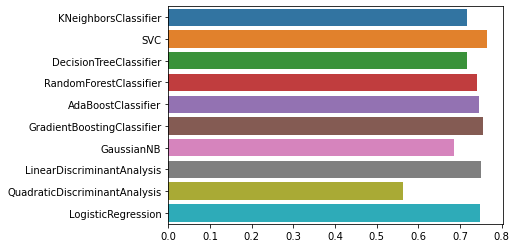

In [81]:
sns.barplot(y=[n.__class__.__name__  for n in classifiers], x=scores, orient='h')

## Saving the dataframes to further work

In [82]:
df_pca['Survived'] = df['Survived']
df_pca.to_csv('./data/titanic_kernel.csv')